       label  pixel0  pixel1  pixel2  ...  pixel780  pixel781  pixel782  pixel783
0          1       0       0       0  ...         0         0         0         0
1          0       0       0       0  ...         0         0         0         0
2          1       0       0       0  ...         0         0         0         0
3          4       0       0       0  ...         0         0         0         0
4          0       0       0       0  ...         0         0         0         0
...      ...     ...     ...     ...  ...       ...       ...       ...       ...
41995      0       0       0       0  ...         0         0         0         0
41996      1       0       0       0  ...         0         0         0         0
41997      7       0       0       0  ...         0         0         0         0
41998      6       0       0       0  ...         0         0         0         0
41999      9       0       0       0  ...         0         0         0         0

[42000 rows x 7

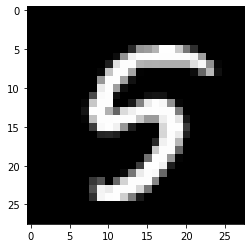

(array([    6,    18,    29, ..., 41980, 41983, 41997]), array([0, 0, 0, ..., 0, 0, 0]))


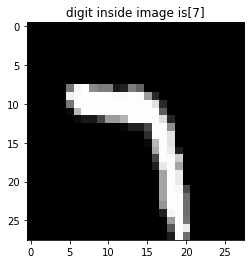

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(kernel='linear', random_state=0)
[[1632    0    4    6    4   13   13    1    5    0]
 [   1 1828    8    3    2    1    1    2   18    1]
 [  16   19 1467   35   25    3   14   25   24    4]
 [   9    4   53 1540    4   63    4   10   38   10]
 [   6    6   18    2 1516    1   10   10    5   48]
 [  19   14   12   93   12 1271   26    4   41   13]
 [  15    1   24    3   17   19 1606    0    3    0]
 [   4    8   22   12   27    8    2 1597    2   73]
 [   7   37   33  106   10   60    6    9 1352   17]
 [  10   13   11   20  120    8    0   81    6 1414]]
90.61309523809524


In [23]:
#importing libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


#importing datasets
df= pd.read_csv("/content/digit_svm (1).csv")
print(df)

# EDA

#1.head of the dataset
print(df.head())
print(df.tail())
print(df.sample(10))


#2.the shape of the dataset
print(df.shape)


#3.list types of all columns
print(df.dtypes)


#4.info of the dataset
print(df.info())


#5.summary of the dataset
print(df.describe())


# DATA CLEANING
#1.drop the duplicates
print(df.shape)
df=df.drop_duplicates()
print(df.shape)


#2.check the NULL values
print(df.isnull().sum())
print(df.columns)

df=df.dropna()
print(df)

#i have to cross checked that given images are correct or not
#partation data in x and y and convert them numpy matrix
#numpy matrix used to hold the pixel values
#Extracting Independent and dependent Variable

x= df.iloc[:,1:].values
print(x.shape)
y= df.iloc[:,0:1].values
print(y.shape)
print(x)
print(y)

#now cross check about the images
#image label in side y and image pixel value are inside x
#but they are sharing the same index
#i have selected index=2 we know in the dataframe on index 2 we have 1
var = x[8]
print(var)
print(y[8])


##showing the image using matplotlib
plt.imshow(var.reshape(28,28),cmap='gray')
plt.show()


#find where the digit 7,return its index
var1 = np.where(y==7)
print(var1)


#find the image of 3 and 9
def show_image(index):
 var=x[index]
 plt.title("digit inside image is"+str(y[index]))
 plt.imshow(var.reshape(28,28),cmap='gray')
 plt.show()
show_image(41980)


# Splitting the dataset into training and test set.
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.4,random_state=8)
print(x_test)

#support vector machine algorithm
from sklearn.svm import SVC
clf = SVC(kernel='linear',random_state=0)
clf.fit(x_train,y_train)
print(clf)


# #Predicting the test set result
y_pred = clf.predict(x_test)


# #Creating the Confusion matrix
from sklearn.metrics import confusion_matrix
cm= confusion_matrix(y_test,y_pred)
print(cm)


#classification matrics
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test,y_pred)
print(acc*100)